# Clasificación de flores Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,:2]
Y = iris.target 

In [4]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h =(x_max-x_min)/100

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
x_plot = np.c_[xx.ravel(),yy.ravel()]

In [5]:
C = 1.0
svc = svm.SVC(kernel='linear',C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de iris con un KERNEL LINEAL')

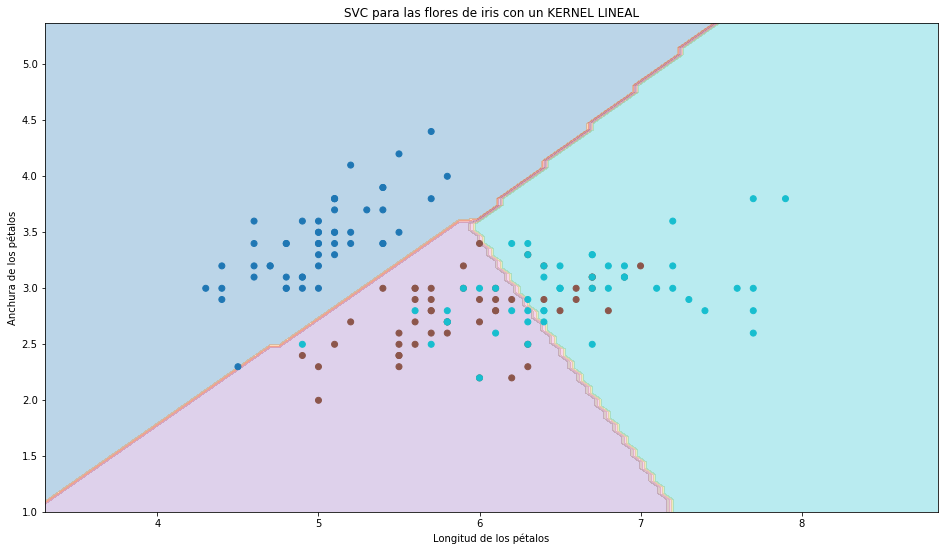

In [6]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap = plt.cm.tab10,alpha = 0.3)
plt.scatter(X[:,0],X[:,1],c=Y, cmap = plt.cm.tab10)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(),xx.max())
plt.title('SVC para las flores de iris con un KERNEL LINEAL')

In [7]:
C = 1.0
svc = svm.SVC(kernel='rbf',C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de iris con un KERNEL RADIAL')

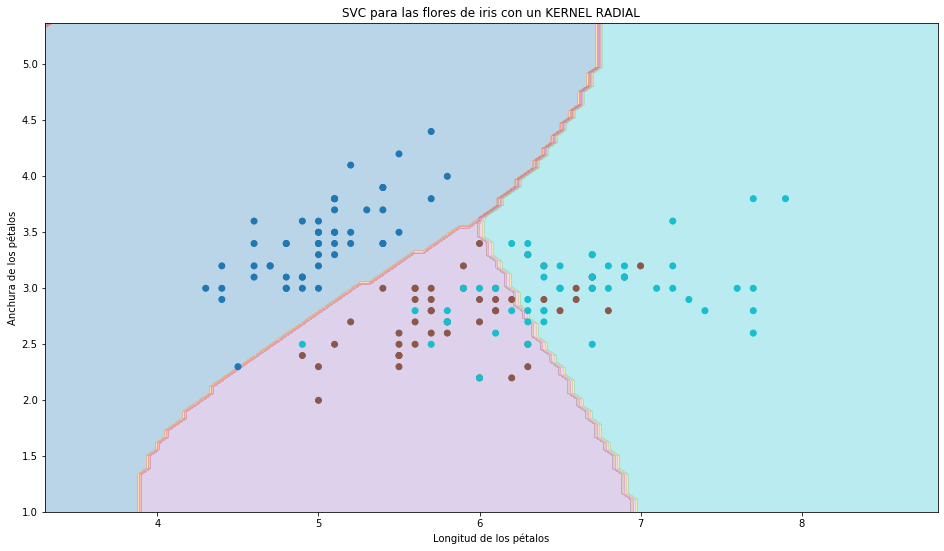

In [8]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap = plt.cm.tab10,alpha = 0.3)
plt.scatter(X[:,0],X[:,1],c=Y, cmap = plt.cm.tab10)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(),xx.max())
plt.title('SVC para las flores de iris con un KERNEL RADIAL')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de iris con un KERNEL SIGMOIDE')

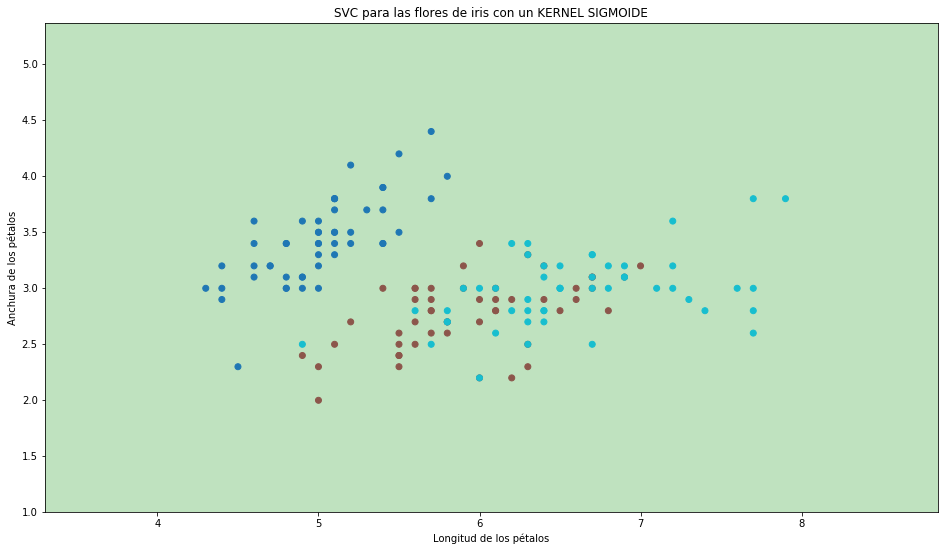

In [9]:
C = 1.0
svc = svm.SVC(kernel='sigmoid',C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap = plt.cm.tab10,alpha = 0.3)
plt.scatter(X[:,0],X[:,1],c=Y, cmap = plt.cm.tab10)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(),xx.max())
plt.title('SVC para las flores de iris con un KERNEL SIGMOIDE')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de iris con un KERNEL POLINOMIAL')

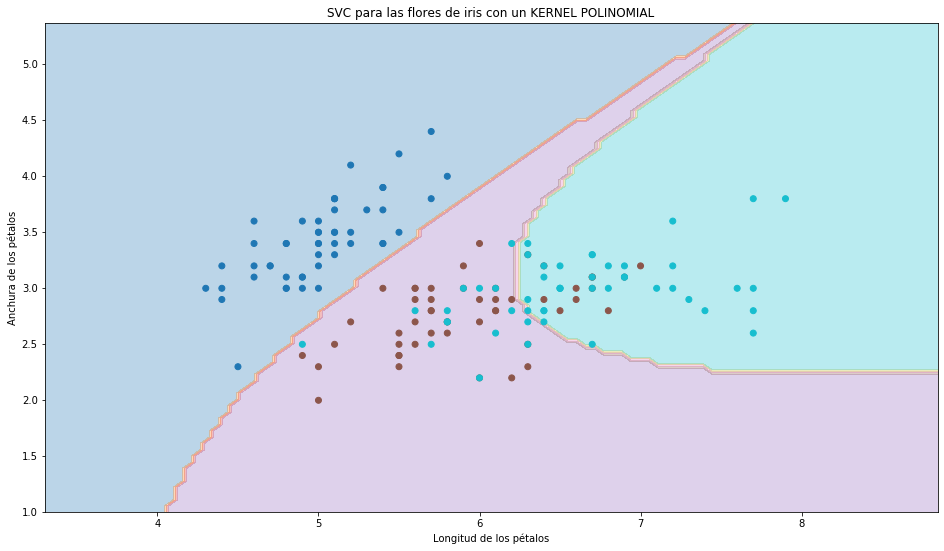

In [10]:
C = 1.0
svc = svm.SVC(kernel='poly',C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap = plt.cm.tab10,alpha = 0.3)
plt.scatter(X[:,0],X[:,1],c=Y, cmap = plt.cm.tab10)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(),xx.max())
plt.title('SVC para las flores de iris con un KERNEL POLINOMIAL')

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [12]:
X,Y = shuffle(X,Y,random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [13]:
parameters = [{
    'kernel':['rbf'],
    'gamma':[1e-4,1e-3,1e-2,0.1,0.2,0.5],
    'C':[1,10,100,1000]
},
    {
        'kernel':['linear'],
        'C':[1,10,100,1000]
    }
]

In [14]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'),param_grid=parameters,cv = 5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [16]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means,stds,params):
    print('%0.3f (+/-%0.3f) para %r'%(m,s,p))

0.747 (+/-0.062) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.065) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.062) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.049) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.063) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.053) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.040) para {'C': 100, 'gamma'

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print(classification_report(Y_test,y_pred,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



# Resumen final de la clasificación de Iris

In [19]:
def svm_iris(C=1.0,gamma=0.01,kernel = 'rbf'):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt
    iris = datasets.load_iris()
    X = iris.data[:,:2]
    Y = iris.target
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h =(x_max-x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    x_plot = np.c_[xx.ravel(),yy.ravel()]
    
    svc = svm.SVC(kernel=kernel,C=C, gamma = gamma,decision_function_shape='ovr').fit(X,Y)
    Ypred = svc.predict(x_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred,cmap = plt.cm.tab10,alpha = 0.3)
    plt.scatter(X[:,0],X[:,1],c=Y, cmap = plt.cm.tab10)
    plt.xlabel('Longitud de los pétalos')
    plt.ylabel('Anchura de los pétalos')
    plt.xlim(xx.min(),xx.max())
    plt.title('SVC para las flores de iris con un KERNEL ' + kernel)

In [20]:
from ipywidgets import interact, fixed

In [21]:
import ipywidgets as widgets

In [22]:
interact(svm_iris,C = [1,10,100,1000,1e6,1e10], gamma =[1e-4,1e-3,1e-2,0.1,0.2,0.5],kernel = ['rbf','linear','sigmoid','precomputed'] )

interactive(children=(Dropdown(description='C', options=(1, 10, 100, 1000, 1000000.0, 10000000000.0), value=1)…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>